In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [3]:
df.shape

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


### Outlier Detection

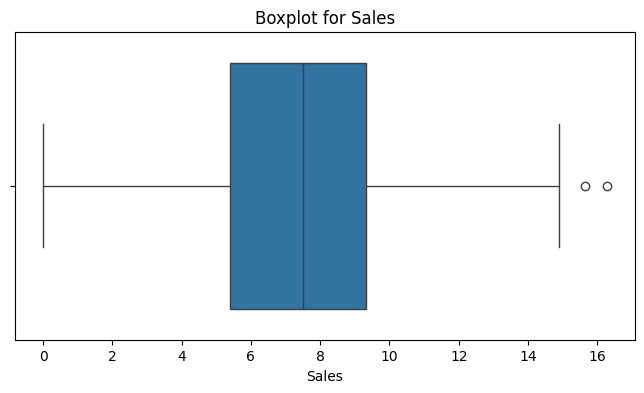

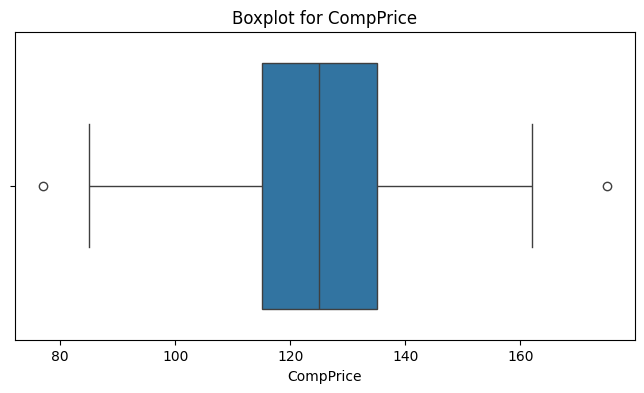

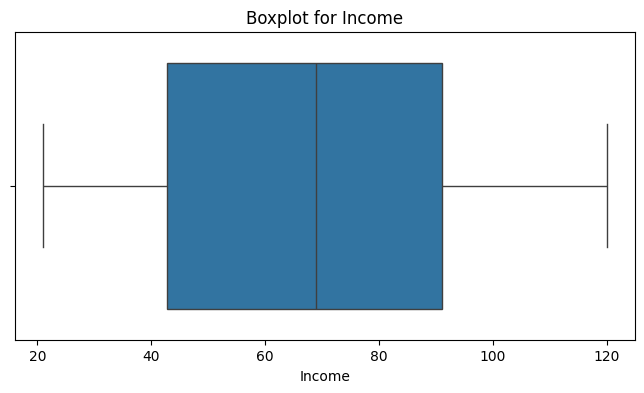

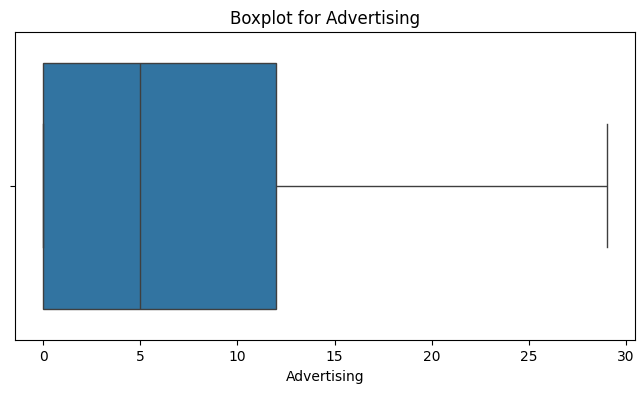

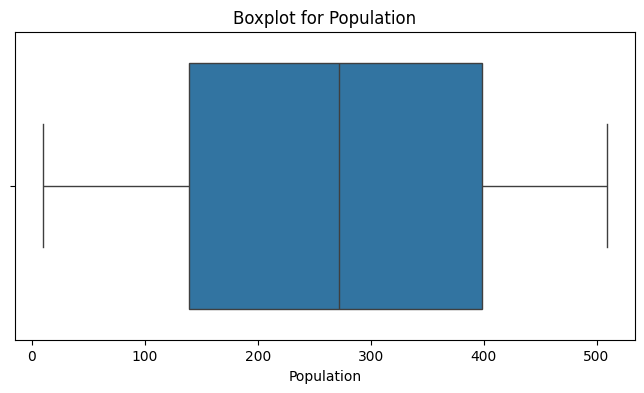

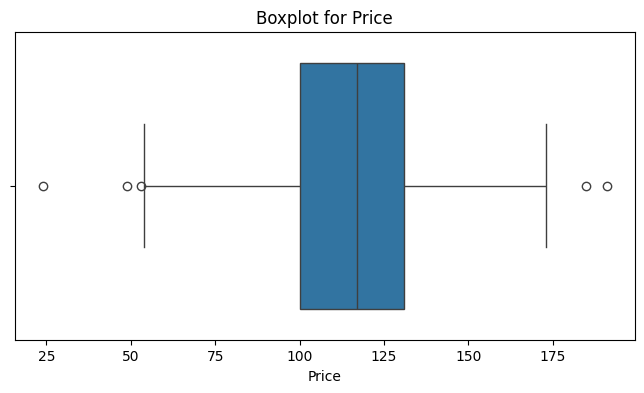

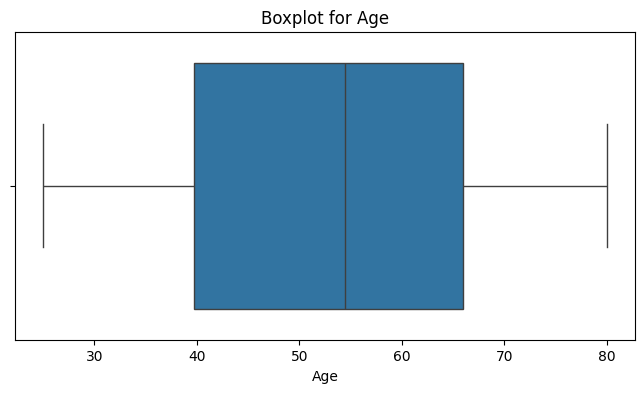

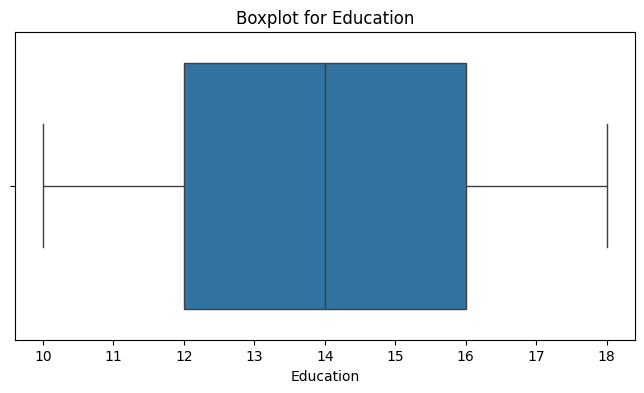

In [8]:
numerical_features = df.select_dtypes(include='number').columns

for feature in numerical_features:
    plt.figure(figsize=(8,4))  # Optional: Set the figure size
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

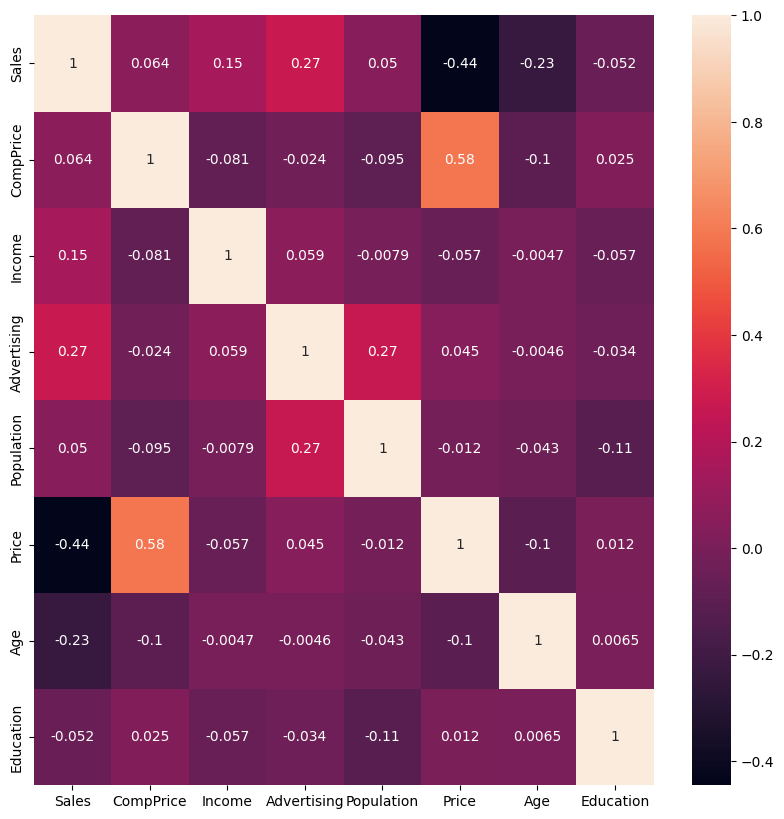

In [9]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Data Visualization

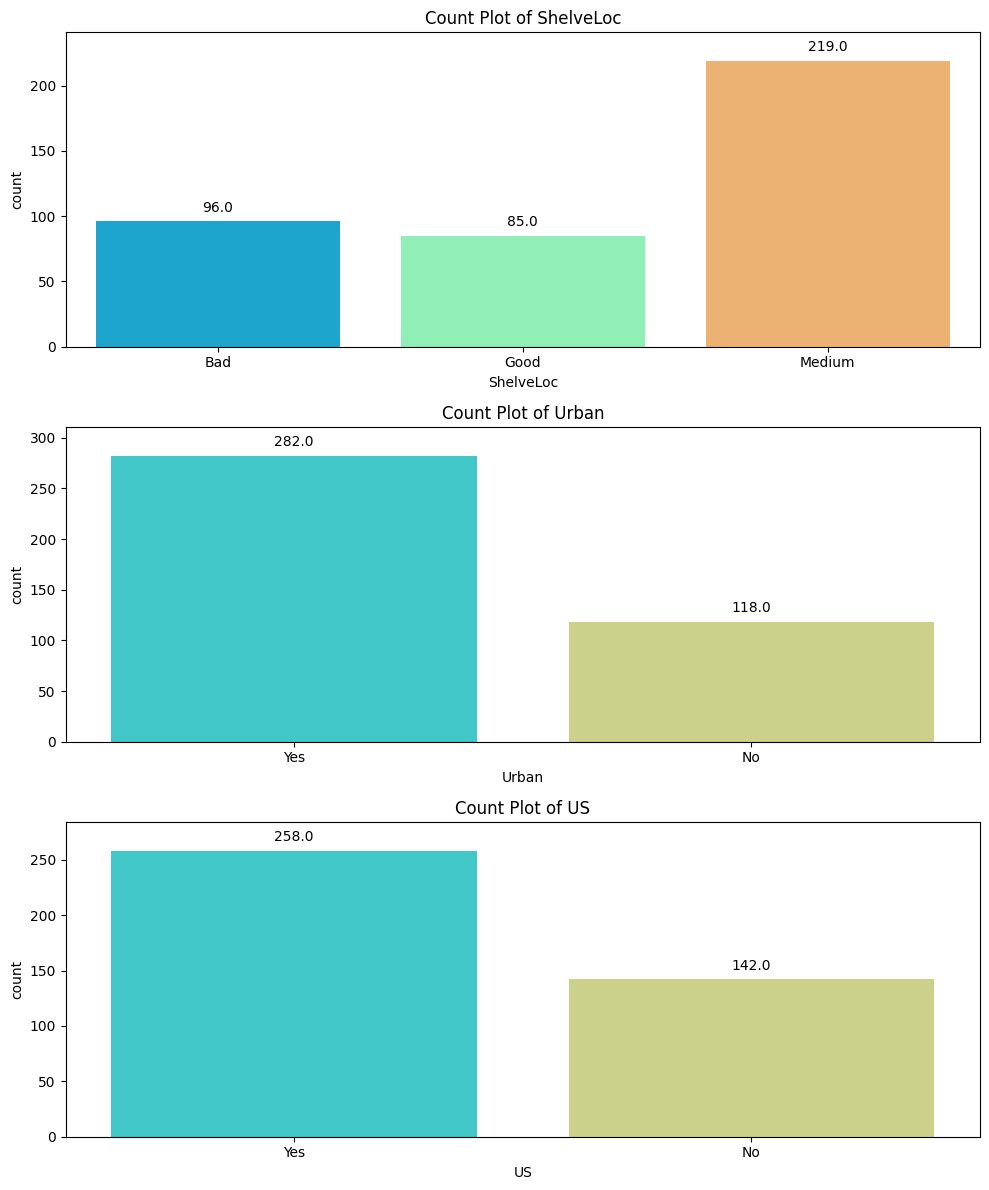

In [10]:
# Constructing count plot fot categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Set up subplots based on the number of columns
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, len(categorical_features) * 4))

# Iterate through each column and create a count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='rainbow')
    axes[i].set_title(f'Count Plot of {feature}')

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    axes[i].set_ylim(top=df[feature].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()

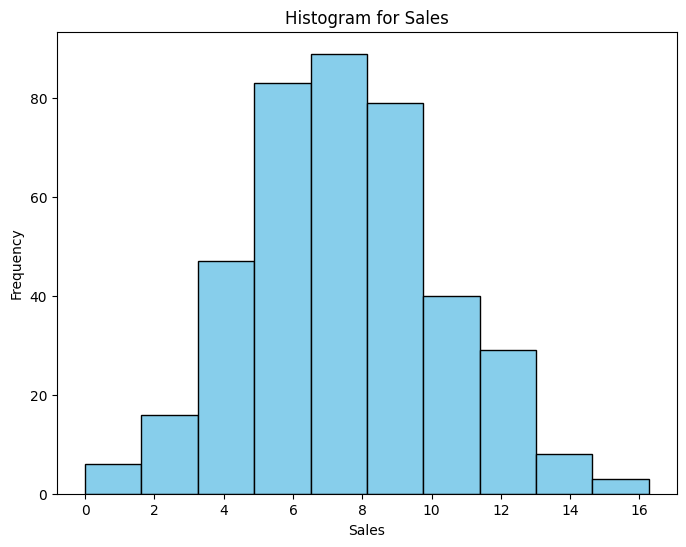

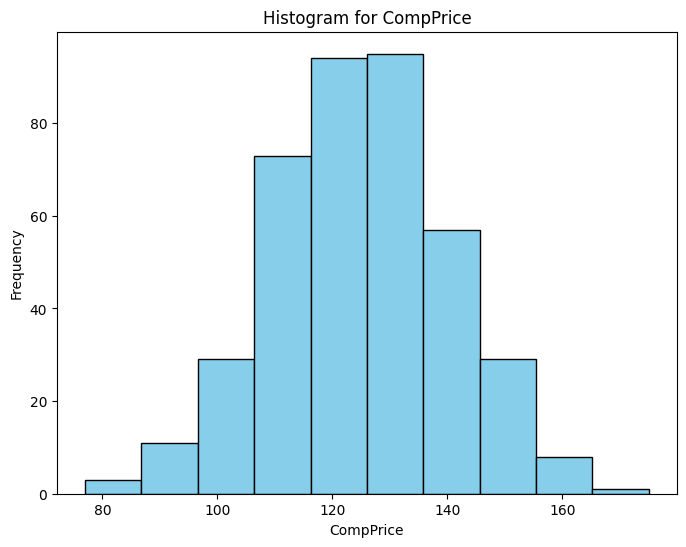

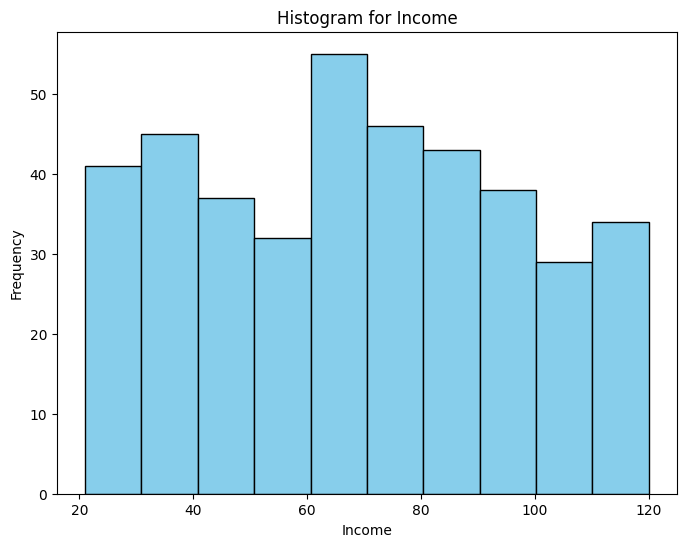

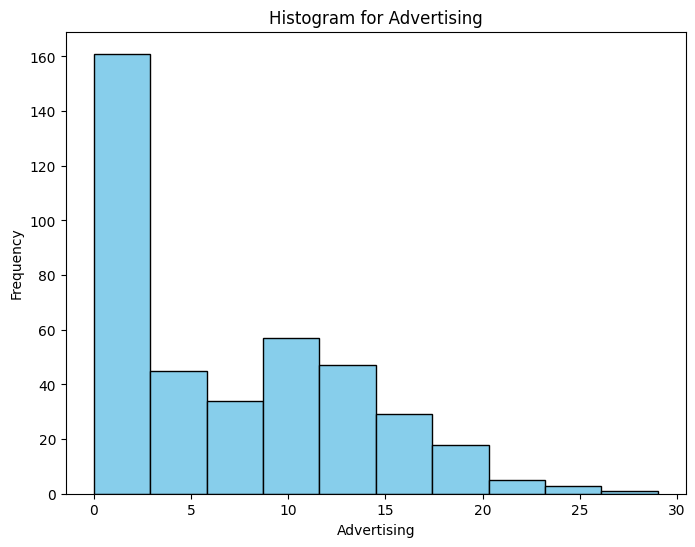

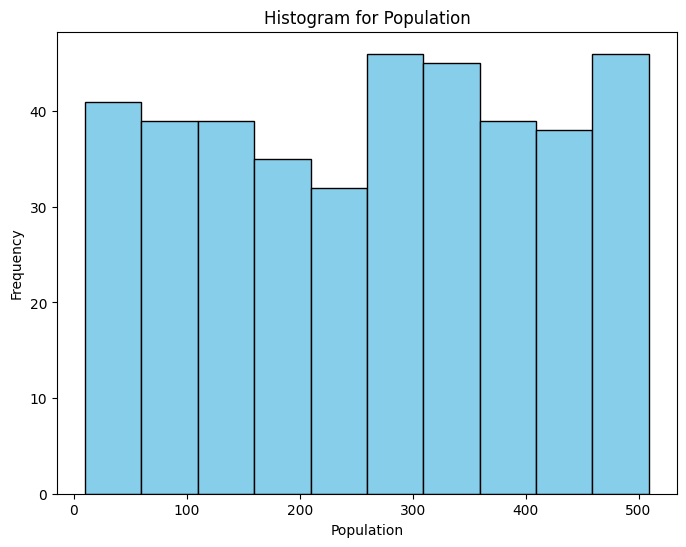

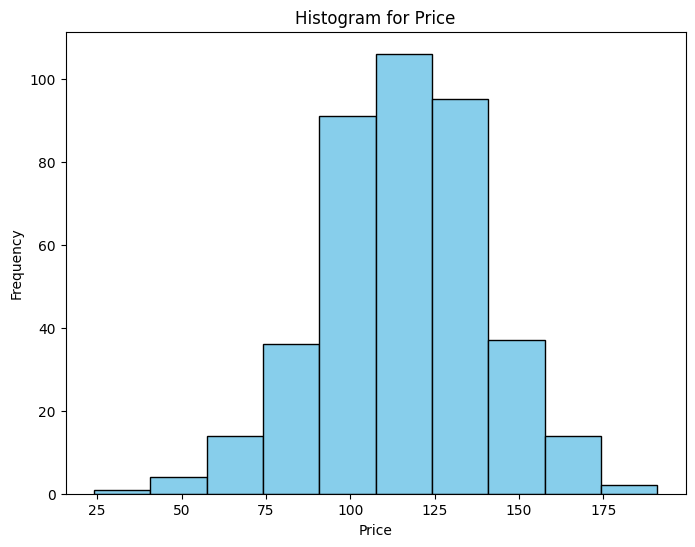

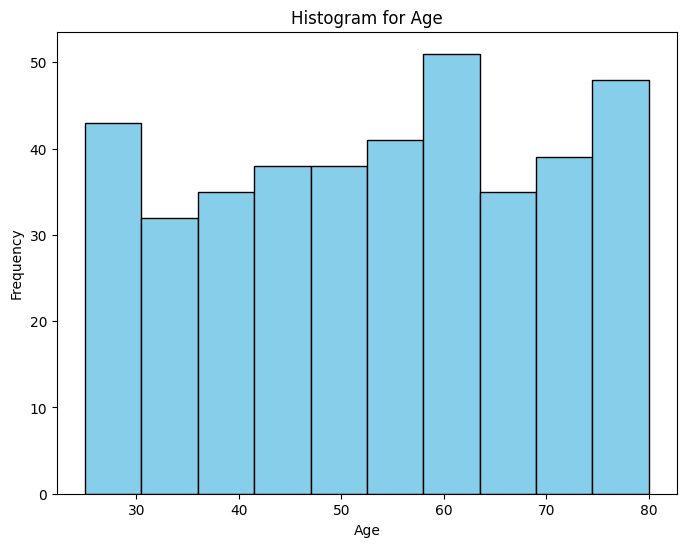

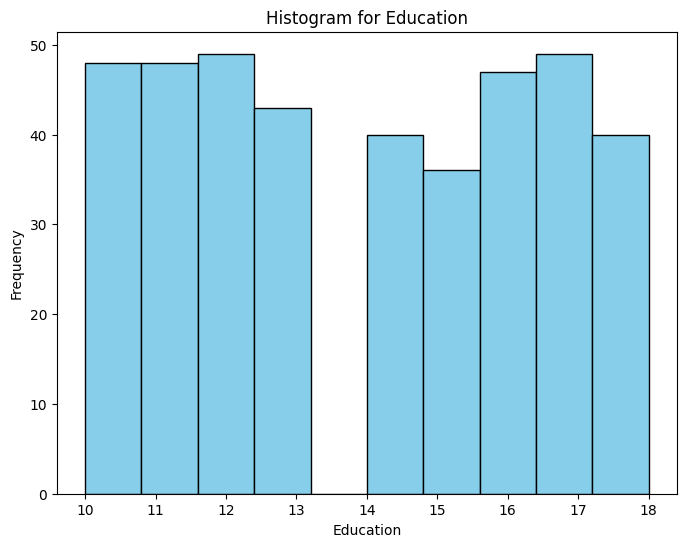

In [11]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

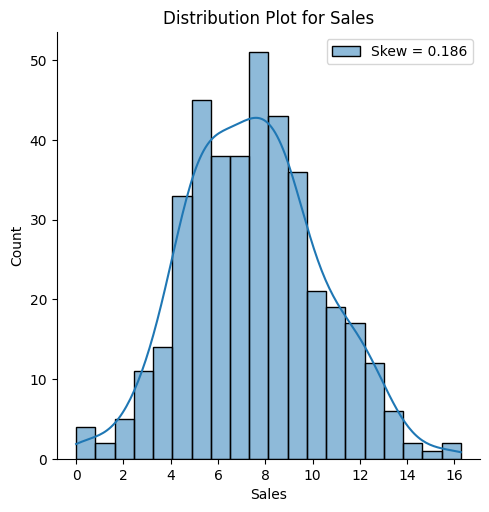

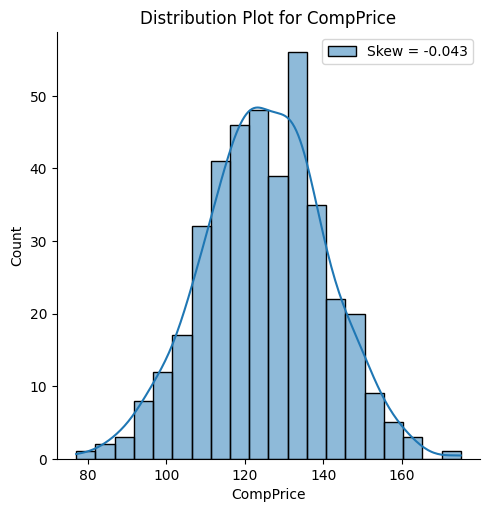

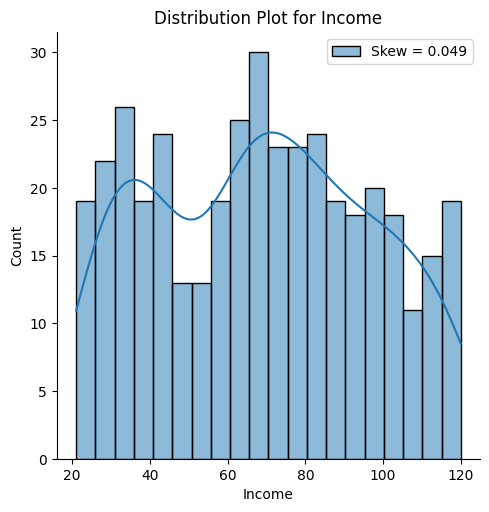

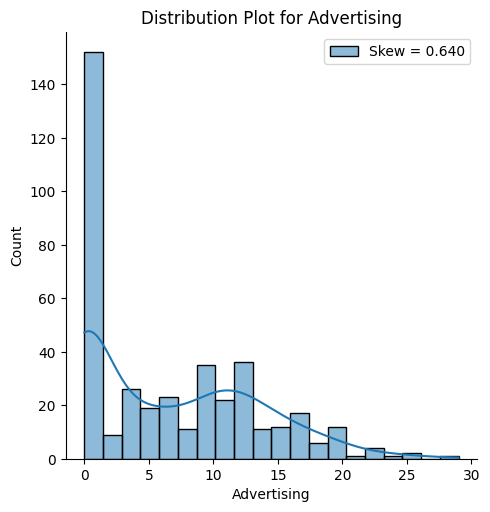

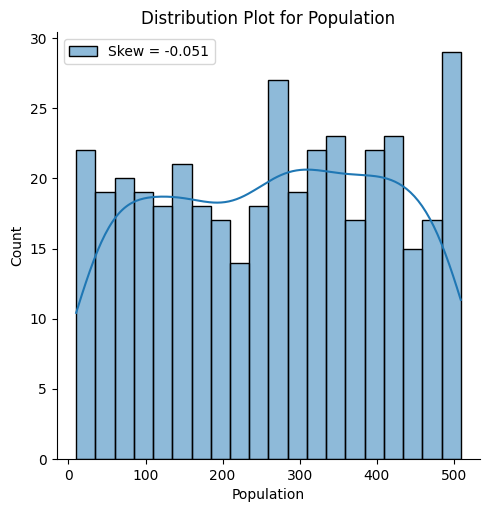

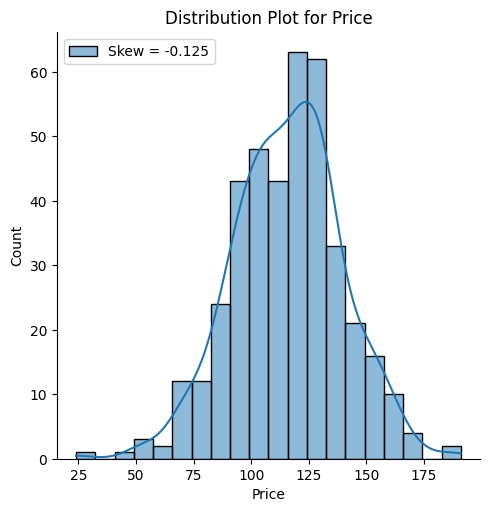

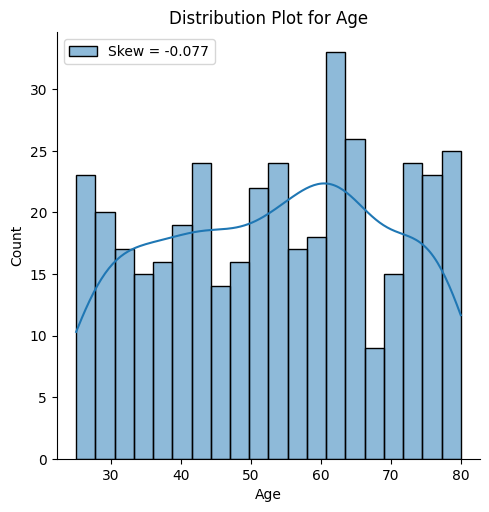

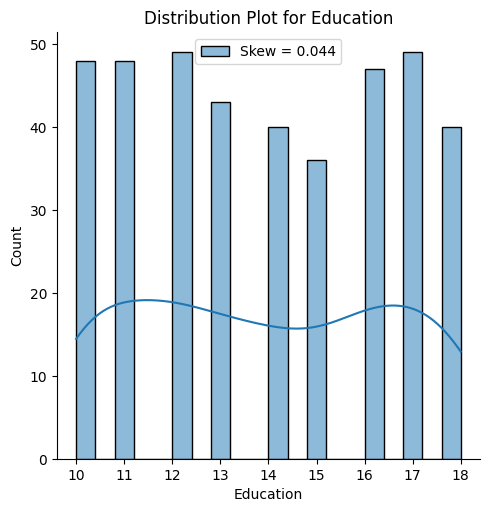

In [12]:
# Distribution plot for all numerical features
numerical_features = df.select_dtypes(include='number').columns

for feature in numerical_features:
    skew = df[feature].skew()
    sns.displot(df[feature], kde= True, label='Skew = %.3f' %(skew), bins=20)
    plt.legend(loc='best')
    plt.title(f'Distribution Plot for {feature}')
    plt.show()

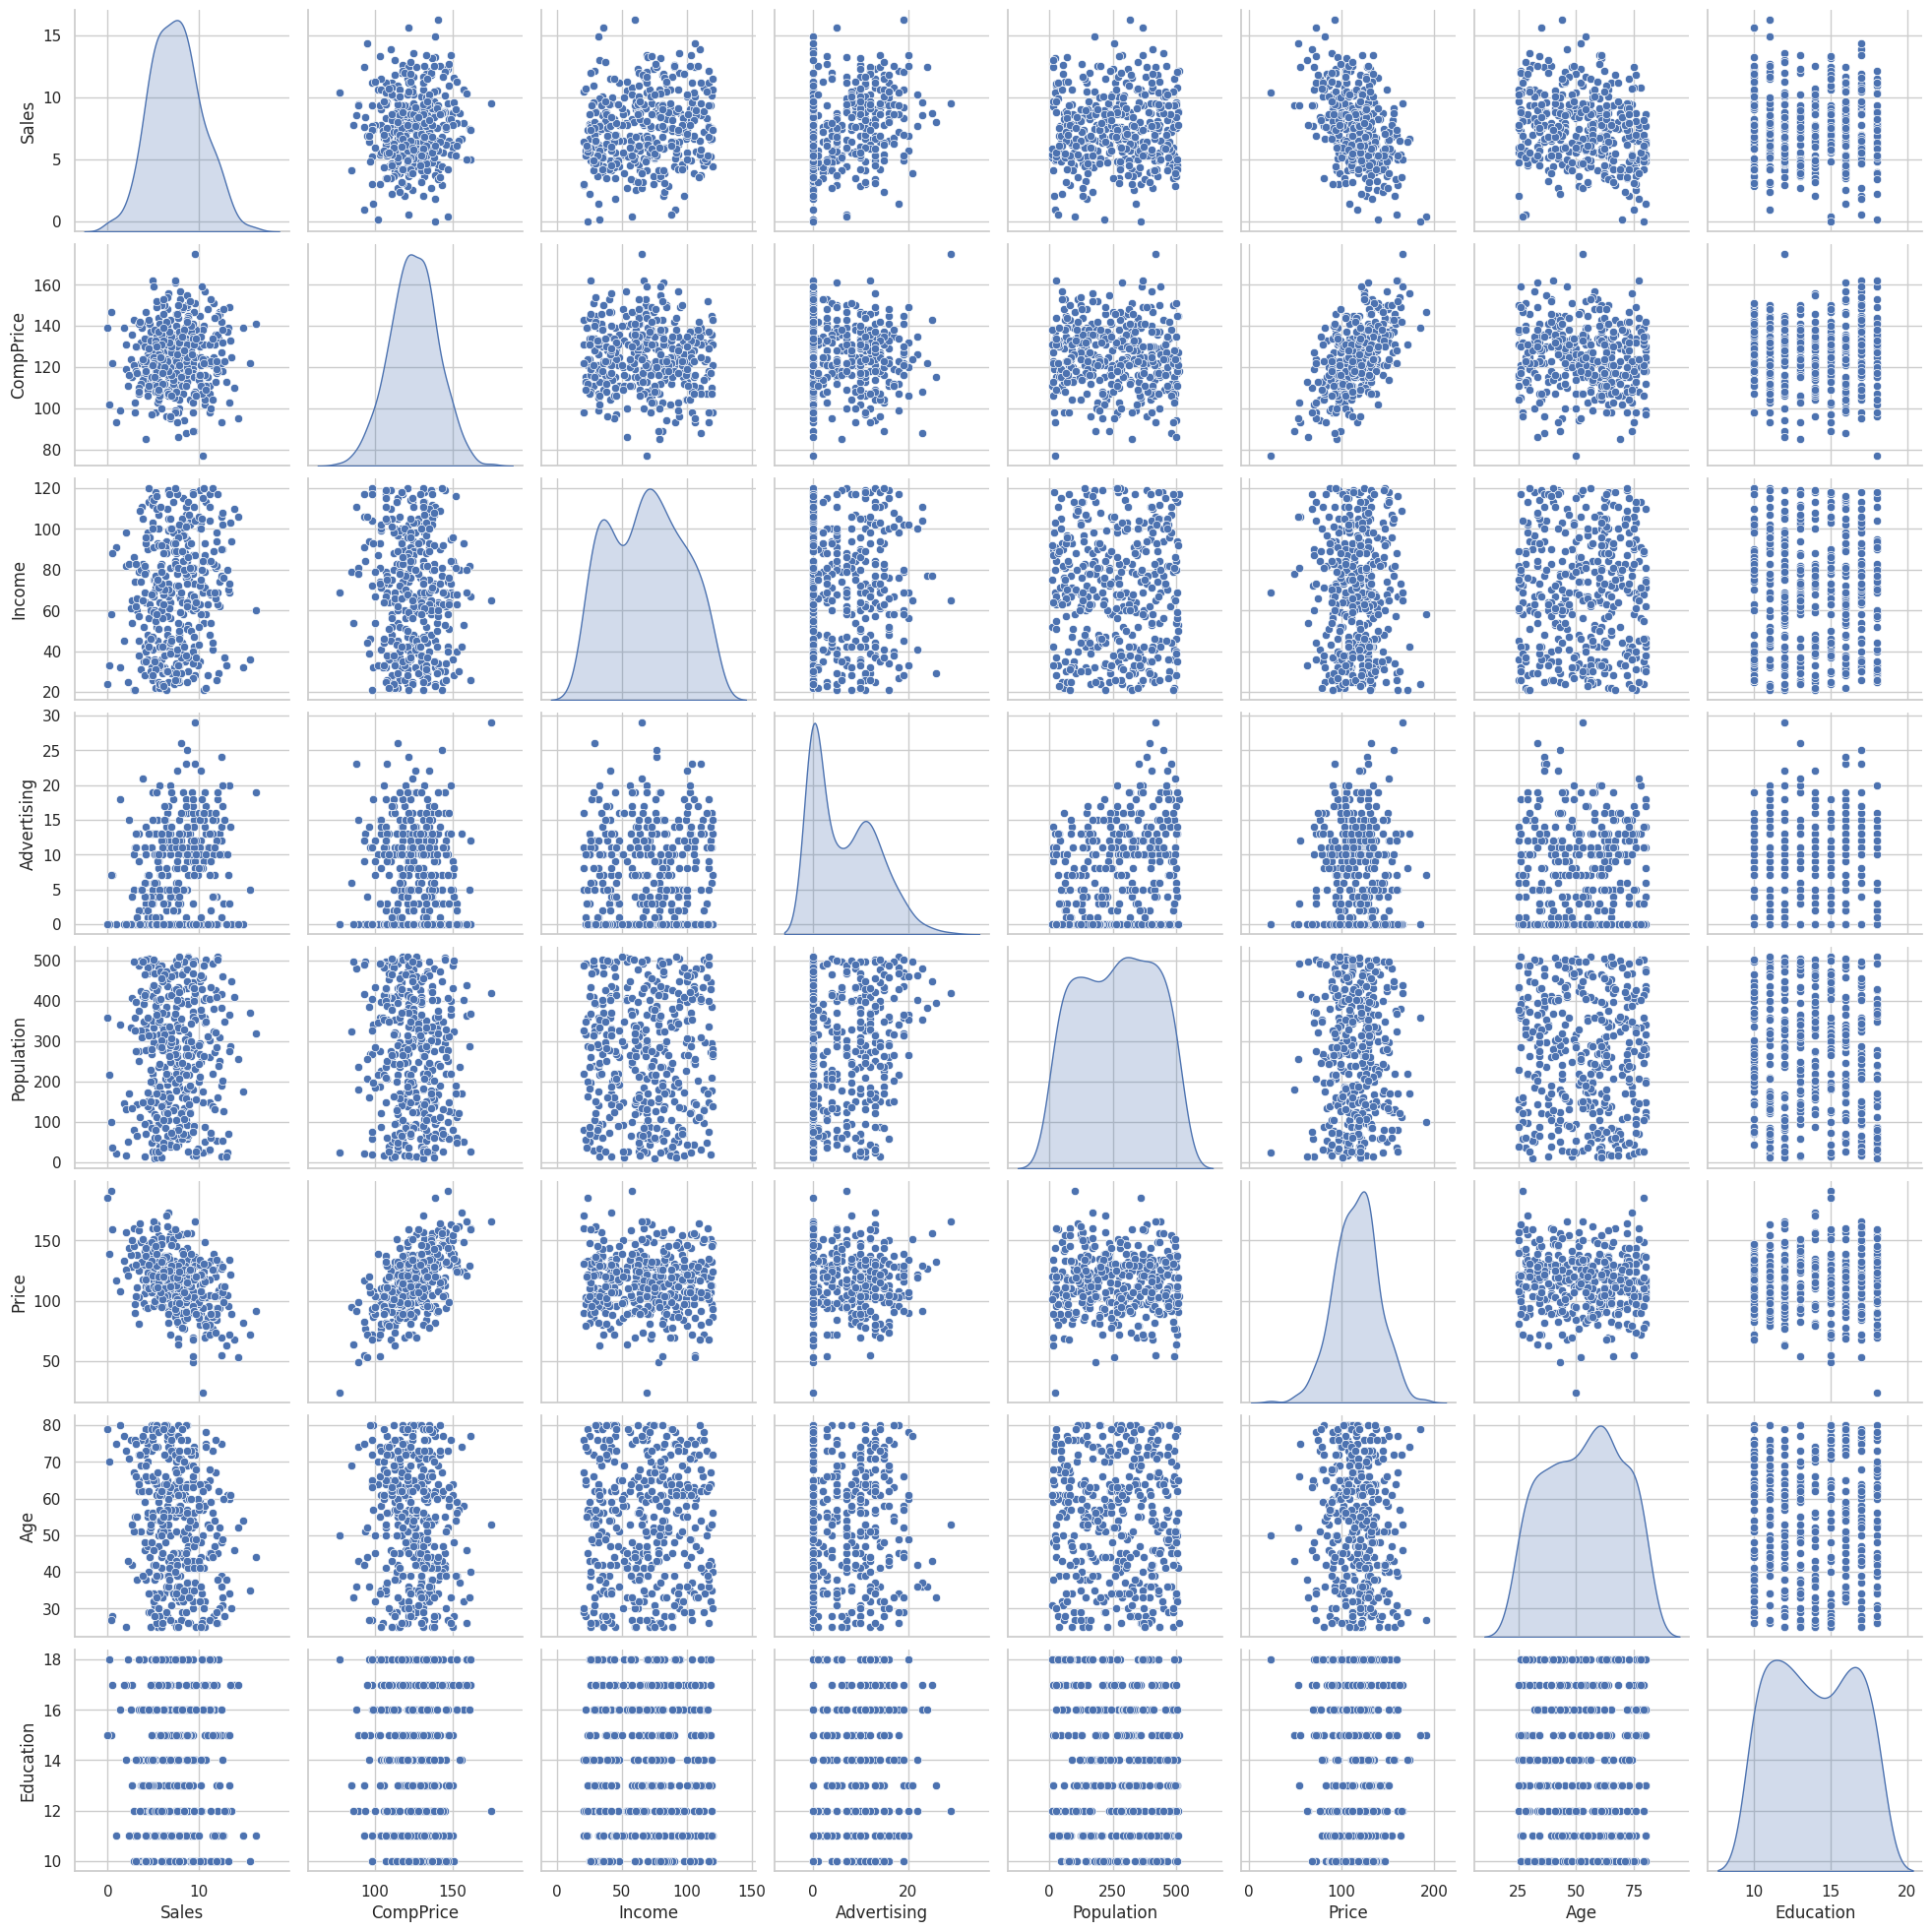

In [13]:
# Pairplot
sns.set(style="whitegrid")
sns.pairplot(df, diag_kind="kde")
plt.show()

# Data Preprocessing

In [14]:
import pandas as pd
mean_sales = df['Sales'].mean()
df['Sales'] = df['Sales'].map(lambda x: 'Low' if x < mean_sales else 'High')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,Low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


#### Converted the 'Sales' variable from numerical to categorical based on its mean value, categorizing observations as '**Low**' if the value is less than the mean_sales and as '**High**' if the value is greater than the mean_sales.

In [15]:
# Label encoding the categorical features
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['ShelveLoc'] = LE.fit_transform(df['ShelveLoc'])
df['Urban'] = LE.fit_transform(df['Urban'])
df['US'] = LE.fit_transform(df['US'])
df['Sales'] = LE.fit_transform(df['Sales'])

## Splitting the data as X and Y

In [16]:
X = df.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
Y = df['Sales']
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales, Length: 400, dtype: int64

## Data Partition

In [18]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

# Building Decision Tree Classifier using **Entropy** Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

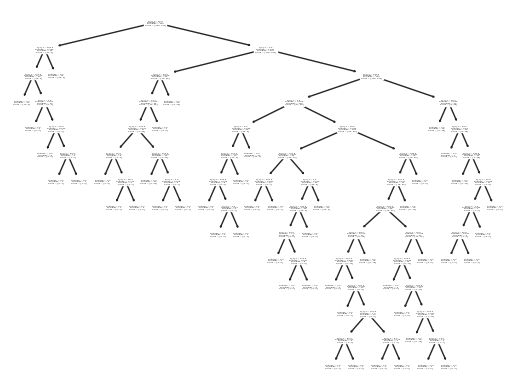

In [20]:
#PLot the decision tree
tree.plot_tree(model);

In [21]:
colnames = list(df.columns[1:])
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

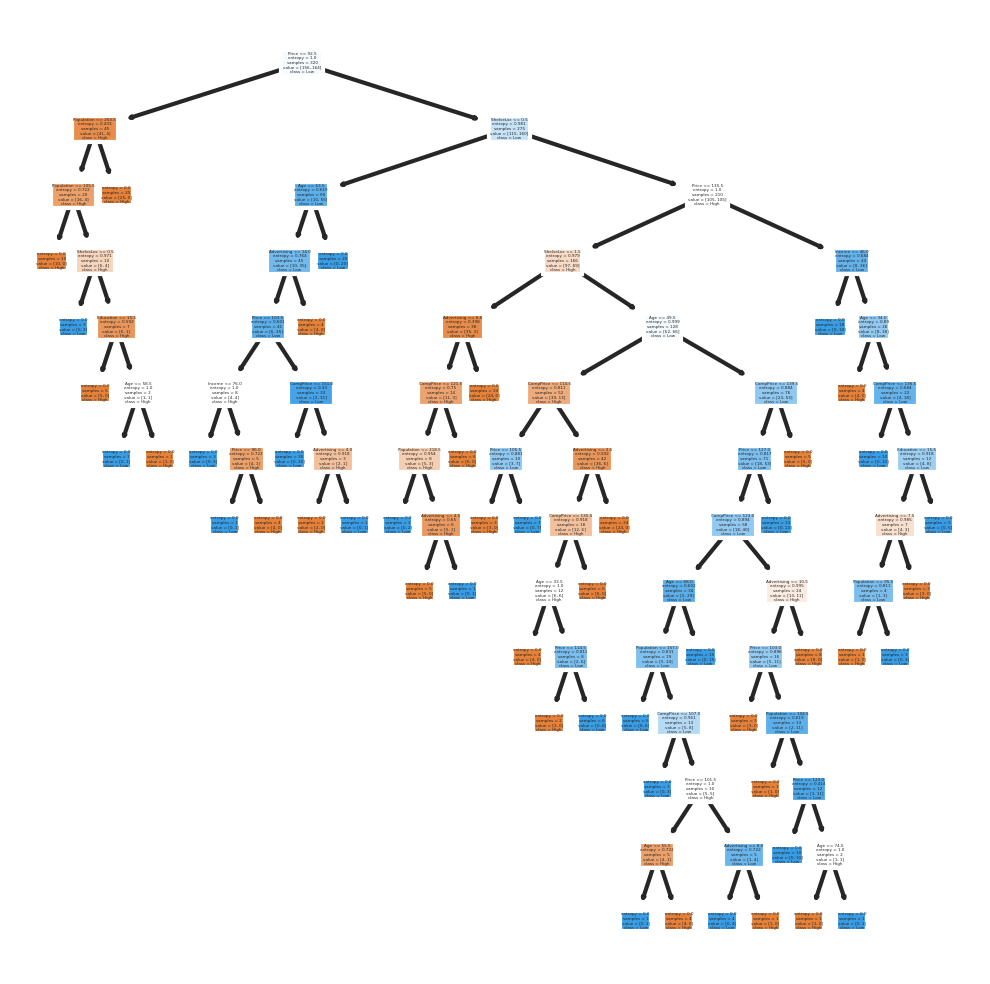

In [22]:
fn=colnames
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [23]:
text = tree.export_text(model)
print(text)

|--- feature_4 <= 92.50
|   |--- feature_3 <= 253.50
|   |   |--- feature_3 <= 105.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  105.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- feature_7 <= 15.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  15.50
|   |   |   |   |   |--- feature_6 <= 58.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  58.50
|   |   |   |   |   |   |--- class: 0
|   |--- feature_3 >  253.50
|   |   |--- class: 0
|--- feature_4 >  92.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_6 <= 63.50
|   |   |   |--- feature_2 <= 14.00
|   |   |   |   |--- feature_4 <= 103.50
|   |   |   |   |   |--- feature_1 <= 76.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  76.00
|   |   |   |   |   |   |--- feature_4 <= 96.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  96.00
| 

In [24]:
model.feature_importances_

array([0.14775068, 0.03543869, 0.14441347, 0.07232263, 0.28417068,
       0.13911833, 0.15719963, 0.0195859 , 0.        , 0.        ])

In [25]:
# Important Features
import pandas as pd
feature_imp = pd.Series(model.feature_importances_, index = fn).sort_values(ascending = False)
feature_imp

Price          0.284171
Age            0.157200
CompPrice      0.147751
Advertising    0.144413
ShelveLoc      0.139118
Population     0.072323
Income         0.035439
Education      0.019586
Urban          0.000000
US             0.000000
dtype: float64

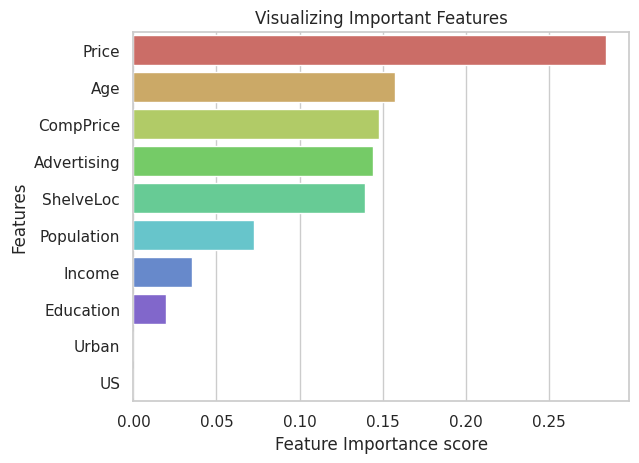

In [26]:
# Visualizing Important Features
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_imp, y = feature_imp.index, palette = 'hls')
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### From the above barplot we can conclude that "**Price**" is the most important feature.

## Training Predictions

In [27]:
# predictions on train Data
pred_train = model.predict(X_train)
pd.Series(pred_train).value_counts()

1    164
0    156
dtype: int64

In [28]:
# training predictions
pred_train

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [29]:
train_pred = pd.DataFrame({'Actual':Y_train, 'Predicted':pred_train})
train_pred

,Actual,Predicted
3,1,1
18,0,0
202,1,1
250,0,0
274,1,1
...,...,...
71,1,1
106,1,1
270,0,0
348,0,0


In [30]:
pd.crosstab(Y_train,pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,156,0
1,0,164


In [31]:
# Training Accuracy
print(' Training Accuracy:',np.mean(pred_train == Y_train).round(3))

 Training Accuracy: 1.0


## Test Predictions

In [32]:
#Predicting on test data
pred_test = model.predict(X_test) # predicting on test data set
pd.Series(pred_test).value_counts() # getting the count of each category

0    47
1    33
dtype: int64

In [33]:
pred_test

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [34]:
test_pred = pd.DataFrame({'Actual':Y_test, 'Predicted':pred_test})
test_pred

,Actual,Predicted
209,1,0
280,1,1
33,0,0
210,1,1
93,0,0
...,...,...
246,1,0
227,0,1
369,0,0
176,1,0


In [35]:
pd.crosstab(Y_test,pred_test) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,32,11
1,15,22


In [36]:
# Accuracy
print(' Test Accuracy:',np.mean(pred_test == Y_test).round(3))

 Test Accuracy: 0.675


## Evaluating model performance with **Cross-Validation**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')

In [39]:
training_accuracy = []
test_accuracy = []

for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

import numpy as np
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


Average training accuracy: 1.0
Average test accuracy: 0.728


#            

# Building Decision Tree Classifier using **Gini** Criteria

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

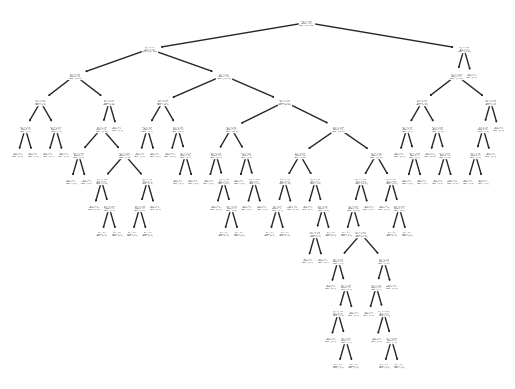

In [41]:
#PLot the decision tree
tree.plot_tree(model_gini);

In [42]:
colnames = list(df.columns[1:])
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

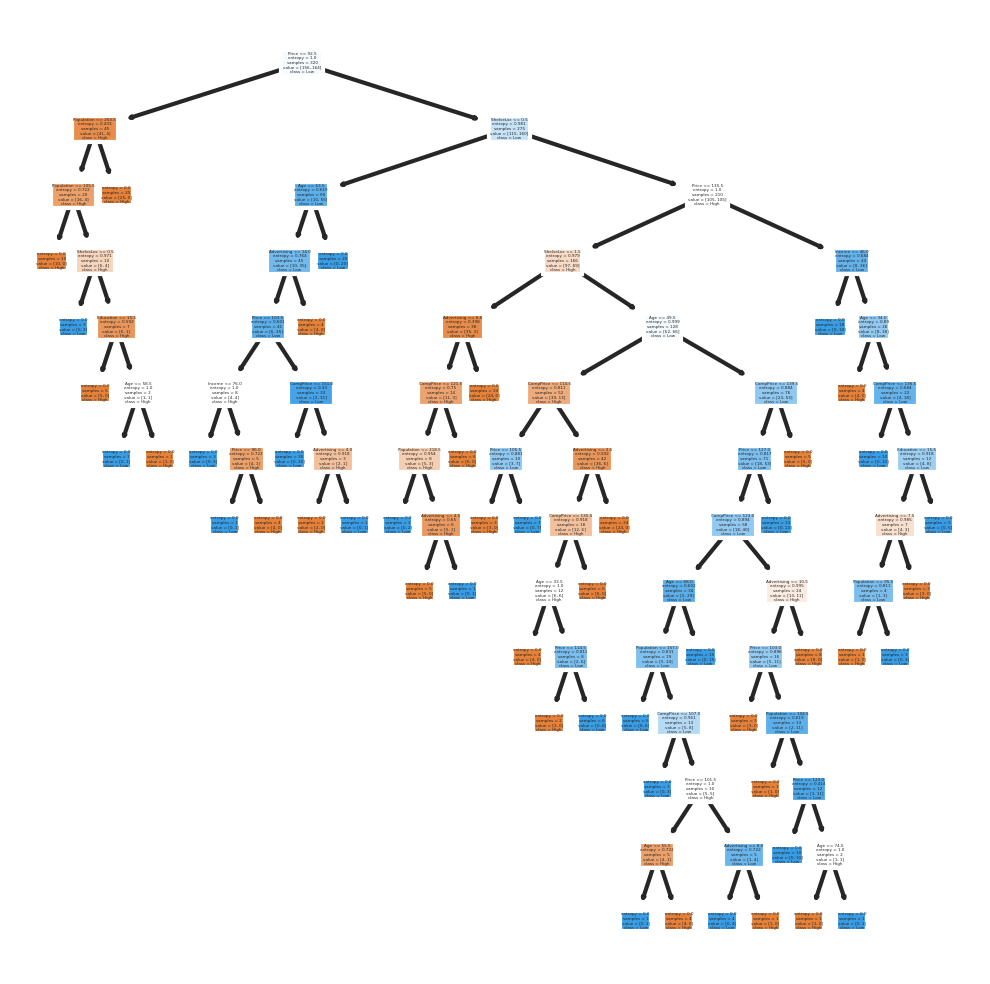

In [43]:
fn=colnames
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [44]:
text = tree.export_text(model_gini)
print(text)

|--- feature_4 <= 131.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_4 <= 92.50
|   |   |   |--- feature_1 <= 52.00
|   |   |   |   |--- feature_4 <= 90.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  90.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  52.00
|   |   |   |   |--- feature_3 <= 120.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  120.00
|   |   |   |   |   |--- class: 0
|   |   |--- feature_4 >  92.50
|   |   |   |--- feature_2 <= 18.50
|   |   |   |   |--- feature_7 <= 10.50
|   |   |   |   |   |--- feature_4 <= 102.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  102.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  10.50
|   |   |   |   |   |--- feature_0 <= 136.00
|   |   |   |   |   |   |--- feature_2 <= 14.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  14.00
|   |   |   |   |   |   |   |--- feature_4 <= 102

In [45]:
#Prediction and computing the accuracy
pred_test=model_gini.predict(X_test)
print('Test Accuracy :',np.mean(pred_test==Y_test))

Test Accuracy : 0.7875


In [46]:
model_gini.feature_importances_

array([0.11938711, 0.12085912, 0.0894174 , 0.04236773, 0.30191276,
       0.14704074, 0.1020138 , 0.05011536, 0.02063573, 0.00625024])

In [47]:
# Important Features
import pandas as pd
feature_imp_gini = pd.Series(model_gini.feature_importances_, index = fn).sort_values(ascending = False)
feature_imp_gini

Price          0.301913
ShelveLoc      0.147041
Income         0.120859
CompPrice      0.119387
Age            0.102014
Advertising    0.089417
Education      0.050115
Population     0.042368
Urban          0.020636
US             0.006250
dtype: float64

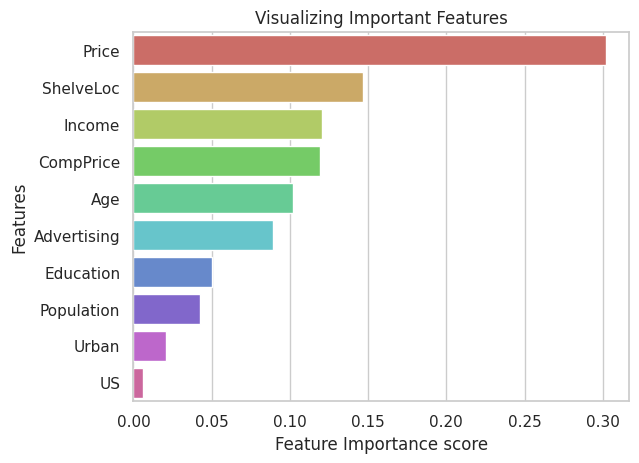

In [48]:
# Visualizing Important Features
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_imp_gini, y = feature_imp_gini.index, palette = 'hls')
plt.xlabel('Feature Importance score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### From the above barplot we can conclude that "**Price**" is the most important feature.

## Training Predictions

In [49]:
# predictions on train Data
pred_train = model_gini.predict(X_train)
pd.Series(pred_train).value_counts()

0    161
1    159
dtype: int64

In [50]:
# training predictions
pred_train

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [51]:
train_pred = pd.DataFrame({'Actual':Y_train, 'Predicted':pred_train})
train_pred

,Actual,Predicted
269,1,1
389,0,0
232,0,0
89,0,0
236,0,0
...,...,...
350,0,0
251,1,1
192,0,0
71,1,1


In [52]:
pd.crosstab(Y_train,pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,161,0
1,0,159


In [53]:
# Training Accuracy
print(' Training Accuracy:',np.mean(pred_train == Y_train).round(3))

 Training Accuracy: 1.0


## Test Predictions

In [54]:
#Predicting on test data
pred_test = model_gini.predict(X_test) # predicting on test data set
pd.Series(pred_test).value_counts() # getting the count of each category

1    41
0    39
dtype: int64

In [55]:
pred_test

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [56]:
test_pred = pd.DataFrame({'Actual':Y_test, 'Predicted':pred_test})
test_pred

,Actual,Predicted
220,0,0
4,1,1
230,1,1
55,1,1
312,1,1
...,...,...
157,0,0
319,1,0
246,1,0
358,1,1


In [57]:
pd.crosstab(Y_test,pred_test) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,30,8
1,9,33


In [58]:
# Accuracy
print(' Test Accuracy:',np.mean(pred_test == Y_test).round(3))

 Test Accuracy: 0.788


In [59]:
# Accuracy
print(' Test Accuracy:',accuracy_score(pred_test,Y_test).round(3))

 Test Accuracy: 0.788


## Evaluating the model performance with **Cross-Validation**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')

In [62]:
training_accuracy = []
test_accuracy = []

for i in range(1,1001):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train ,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test ,Y_pred_test))

import numpy as np
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))


Average training accuracy: 1.0
Average test accuracy: 0.713


# **Conclusion**

##The training set demonstrates flawless accuracy of **100%** with cross-validation for both the **Entropy** and **Gini** criteria in Decision trees. However, when evaluating the model on the test data through cross-validation, the accuracy diminishes to around **72%** for both decision trees.